# Movie Genre Data Analysis

## Introduction
We are going to focus highly on genres. Here are some things I want to look at:

## Research Questions
1. Which genres are the most common?
2. Which genres have high average budget and revenue?
3. Which genres have high average profit?
4. Which genres have high average popularity?
5. Which genres have the highest number of movies with voting average >= 8?
6. Take a look at profit by genres per year

## Research Hypotheses
1. The best movies according to vote average return high profit and revenue
2. The best movies according to popularity return high profit and revenue
3. Movies with high budgets return high profit
4. Movies with high budgets have a high popularity

In [149]:
import pandas as pd

In [150]:
movies = pd.read_csv(r'Enter Your File Path Here\imdb_movies.csv')
movies_raw = movies.copy() #Creating this incase we need data in its original form

In [151]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [152]:
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)

In [153]:
movies.drop_duplicates(inplace = True)

In [154]:
movies.dropna(subset = ['genres'], inplace = True)

In [155]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500000,2015,137999939.280026,1392445892.523800
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100000,2015,137999939.280026,348161292.489031
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300000,2015,101199955.472019,271619025.407628
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500000,2015,183999919.040035,1902723129.801820
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300000,2015,174799923.088033,1385748801.470520


In [156]:
movies['profit'] = movies['revenue'] - movies['budget']

In [157]:
movies_genre = movies [['popularity', 'budget', 'revenue', 'original_title',
         'runtime', 'genres', 'release_date','release_year', 'vote_count', 'vote_average', 'profit']]

In [158]:
from pandas import Series, DataFrame

In [159]:
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\Gondal\AppData\Local\Temp\ipykernel_3428\1831005858.py:1: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


In [160]:
movies_genre

,popularity,budget,revenue,original_title,runtime,release_date,release_year,vote_count,vote_average,profit,genres_split
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Action
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Adventure
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Science Fiction
0,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,2015,5562,6.500000,1363528810,Thriller
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,2015,6185,7.100000,228436354,Action
...,...,...,...,...,...,...,...,...,...,...,...
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,1966,11,6.500000,0,Mystery
10863,0.065141,0,0,Beregis Avtomobilya,94,1/1/66,1966,11,6.500000,0,Comedy
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,1966,22,5.400000,0,Action
10864,0.064317,0,0,"What's Up, Tiger Lily?",80,11/2/66,1966,22,5.400000,0,Comedy


## Research Questions
### 1. Which genres are the most common?





In [161]:
genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = False)

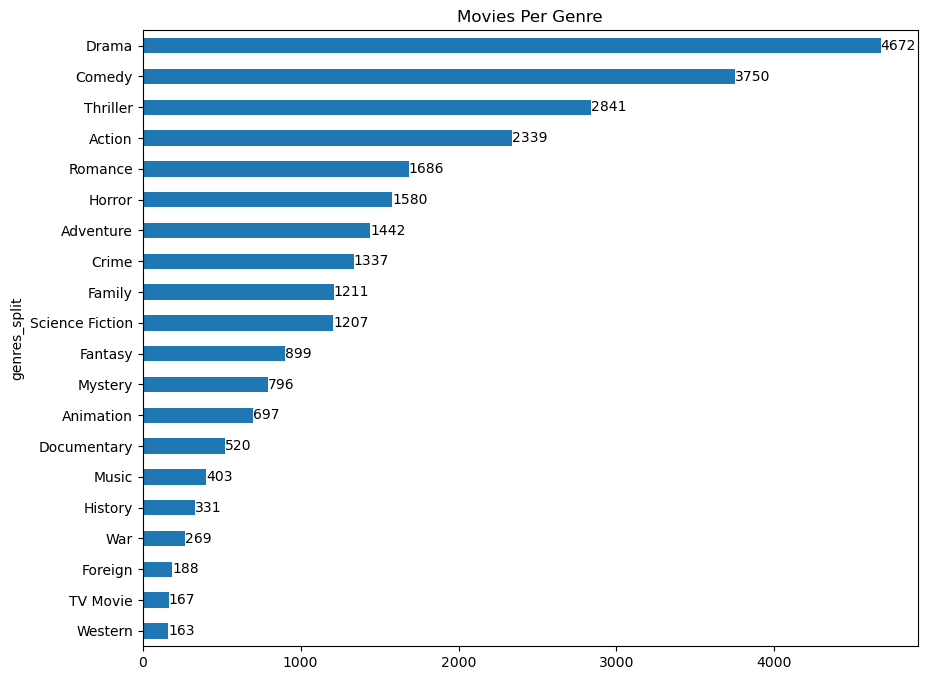

In [162]:
# Sort the data in descending order
sorted_genres_count = genres_count.sort_values('original_title', ascending=True)

# Plot the sorted bar chart
ax = sorted_genres_count['original_title'].plot.barh(title='Movies Per Genre', figsize=(10, 8))

# Add values next to each bar
for index, value in enumerate(sorted_genres_count['original_title']):
    ax.annotate(str(value), xy=(value, index), va='center')

### 2. Which genres have high average budget and revenue?

In [163]:
genres_avg = movies_genre.groupby('genres_split').mean(numeric_only=True)
pd.options.display.float_format = '{:2f}'.format
genres_avg

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
genres_split,,,,,,,,
Action,0.926274,27727820.331376,72794732.002517,104.917785,2000.056208,392.993708,5.787752,45066911.671141
Adventure,1.154259,37543694.530931,113137861.069341,106.173351,1999.388851,513.125085,5.940585,75594166.538409
Animation,0.852182,23159781.606581,75256062.223176,68.181688,2003.995708,303.000000,6.403147,52096280.616595
Comedy,0.592607,13297915.618244,37526242.072238,96.745057,2000.816240,176.436330,5.905167,24228326.453994
Crime,0.744930,17663801.124815,42368661.645495,106.917282,1999.491137,278.805022,6.124889,24704860.520679
Documentary,0.181432,577149.148077,2041106.994231,102.651923,2008.313462,35.105769,6.908462,1463957.846154
Drama,0.591495,11880717.773529,29232255.725840,110.478151,2000.929202,182.544538,6.165546,17351537.952311
Family,0.786668,23359337.420796,72433176.373680,89.603574,2000.774167,272.320877,5.997563,49073838.952884
Fantasy,0.992840,32612585.348253,96313657.081878,100.736900,2000.292576,420.741266,5.863537,63701071.733624


In [164]:
genres_avg.sort_values('revenue',  ascending = True, inplace = True)

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

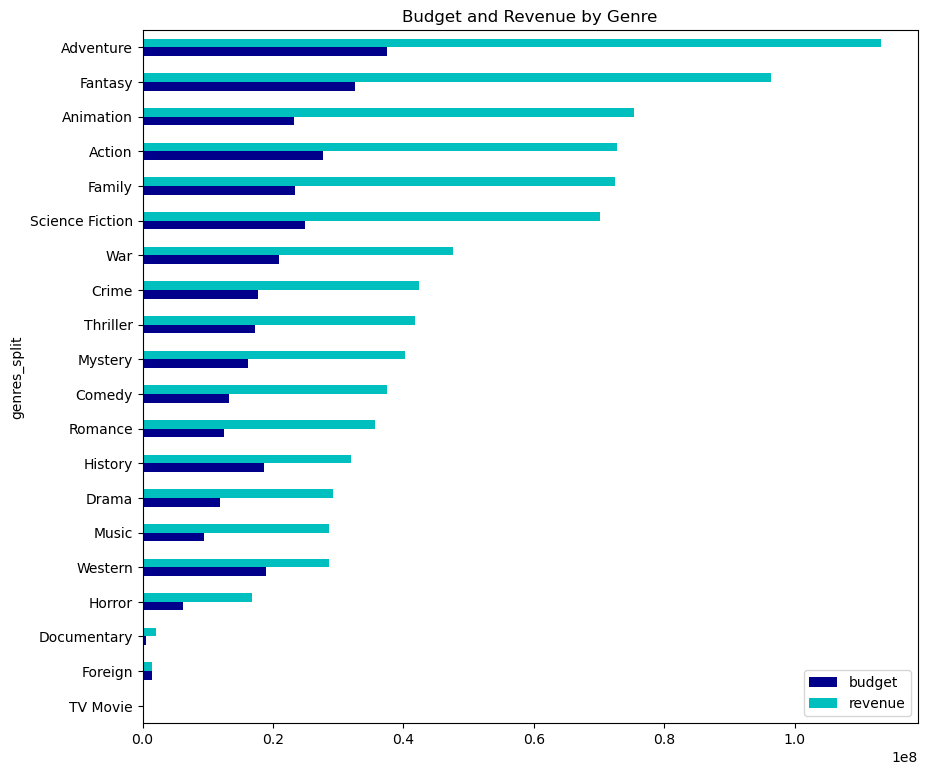

In [165]:
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', color = ('Darkblue', 'c'), figsize = (10,9))

### 3. Which genres have high average profit?

In [166]:
genres_avg.sort_values('profit',  ascending = True, inplace = True)

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

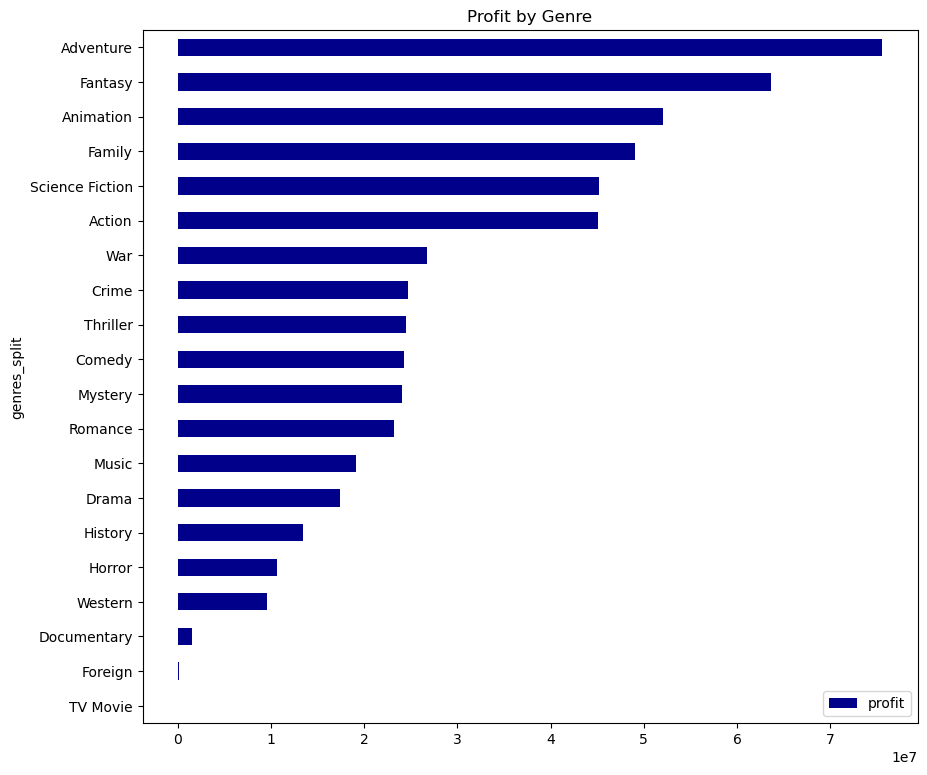

In [167]:
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', color = 'Darkblue', figsize = (10,9))

### 4. Which genres have high average popularity?

In [168]:
genres_avg.sort_values('popularity',  ascending = True, inplace = True)

<Axes: title={'center': 'Popularity by Genre'}, ylabel='genres_split'>

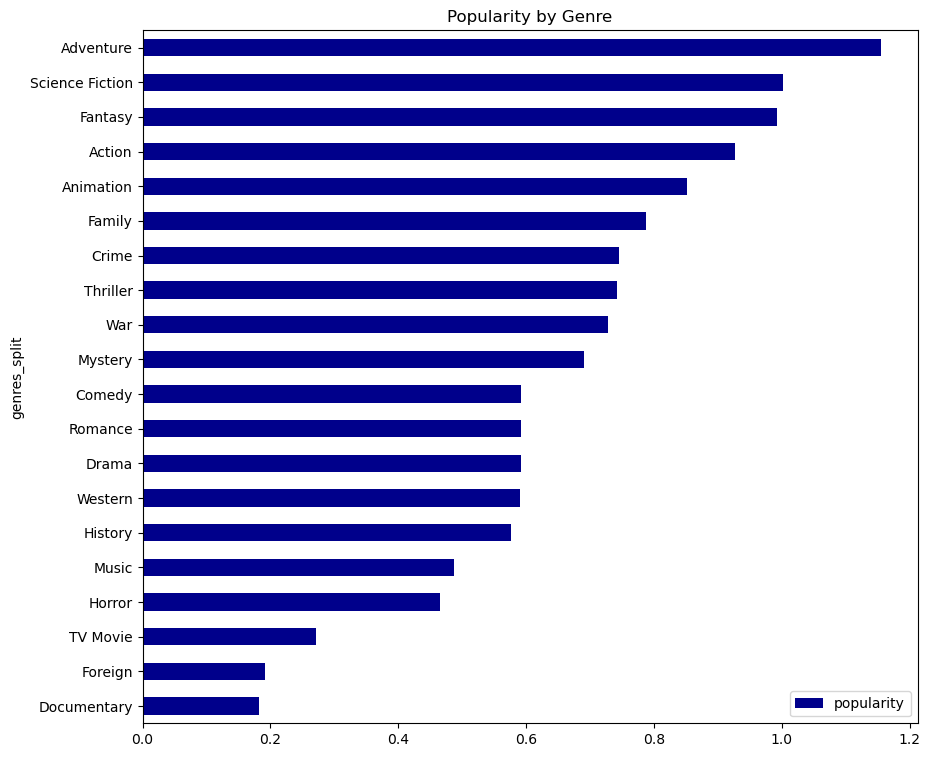

In [169]:
genres_avg[['popularity']].plot.barh(title = 'Popularity by Genre', color = 'Darkblue', figsize = (10,9))

### 5. Which genres have the highest number of movies with voting average >= 8?

In [170]:
genre_vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]

In [171]:
genre_vote = pd.DataFrame(genre_vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)

In [172]:
genre_vote

,vote_average
genres_split,
Fantasy,1
Science Fiction,1
Animation,1
Mystery,1
Horror,1
Family,1
Romance,2
Music,2
History,2


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genres_split'>

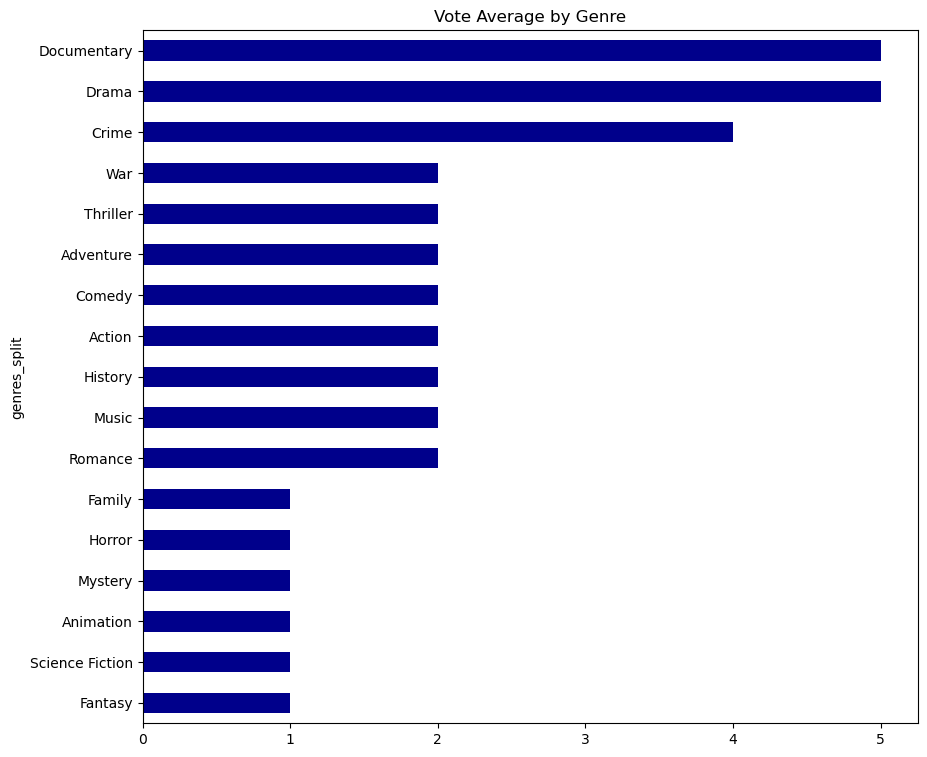

In [173]:
genre_vote['vote_average'].plot.barh(title = 'Vote Average by Genre', color = 'DarkBlue', figsize=(10,9) )

### 6. Take a look at Profit by Genre per year

In [186]:
time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())

In [187]:
final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

Text(0.5, 1.0, 'Genres by Profit Per Year')

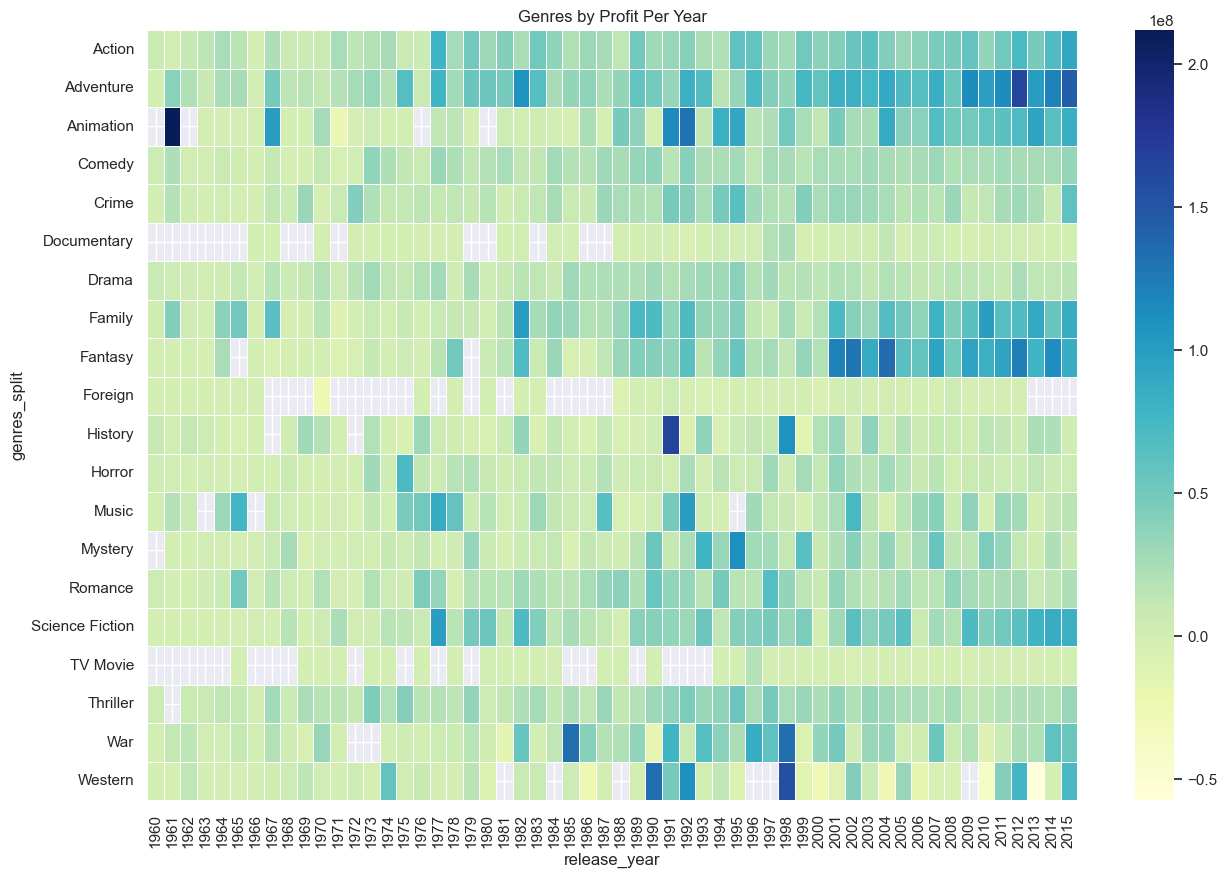

In [189]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit Per Year')

# ---------------------------------------------------------------------------------------------------------------

## Research Hypotheses
1. The best movies according to vote average return high profit and revenue
2. The best movies according to popularity return high profit and revenue
3. Movies with high budgets return high profit
4. Movies with high budgets have a high popularity

In [174]:
movies_raw.drop_duplicates(inplace = True)
movies_raw['profit'] = movies_raw['revenue'] - movies_raw['budget']
movies_genre_raw = movies_raw [['popularity', 'budget', 'revenue', 'original_title',
         'runtime', 'genres', 'release_date','release_year', 'vote_count', 'vote_average', 'profit']]

In [175]:
movies_genre_raw.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,5562,6.500000,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,6185,7.100000,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015,2480,6.300000,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,5292,7.500000,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2015,2947,7.300000,1316249360


In [176]:
movies_counted = movies_genre_raw[movies_genre_raw['vote_count'] >= 50]

# Select only numeric columns from movies_counted
numeric_cols = movies_counted.select_dtypes(include=['float64', 'int64'])
movies_correlation = numeric_cols.corr(method = 'spearman')

movies_correlation

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,profit
popularity,1.000000,0.485149,0.588739,0.230518,0.070723,0.768966,0.188670,0.498117
budget,0.485149,1.000000,0.714828,0.360230,-0.019616,0.554586,-0.044440,0.334390
revenue,0.588739,0.714828,1.000000,0.341707,-0.109091,0.682656,0.111731,0.842221
runtime,0.230518,0.360230,0.341707,1.000000,-0.131599,0.263460,0.285514,0.212060
release_year,0.070723,-0.019616,-0.109091,-0.131599,1.000000,0.148859,-0.153334,-0.099435
vote_count,0.768966,0.554586,0.682656,0.263460,0.148859,1.000000,0.284470,0.583602
vote_average,0.188670,-0.044440,0.111731,0.285514,-0.153334,0.284470,1.000000,0.198308
profit,0.498117,0.334390,0.842221,0.212060,-0.099435,0.583602,0.198308,1.000000


### 1. The best movies according to vote average return high profit and revenue

In [177]:
correlation = numeric_cols['vote_average'].corr(numeric_cols['profit'], method='spearman')
print(f"The Spearman correlation between 'vote_average' and 'profit' is: {correlation:.2f}")

The Spearman correlation between 'vote_average' and 'profit' is: 0.20


<Axes: xlabel='vote_average', ylabel='profit'>

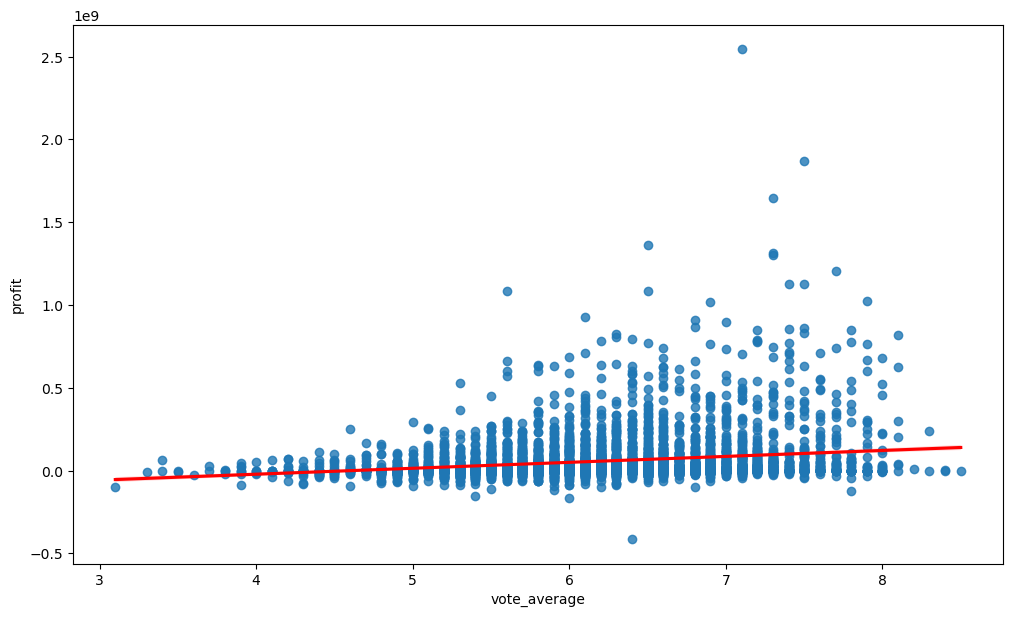

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 7))

sns.regplot(x= 'vote_average', y = 'profit', data = movies_counted, ax =ax, line_kws = {'color' : 'red'})

### 2. The best movies according to popularity return high profit and revenue

In [179]:
correlation = numeric_cols['popularity'].corr(numeric_cols['revenue'], method='spearman')
print(f"The Spearman correlation between 'popularity' and 'revenue' is: {correlation:.2f}")

The Spearman correlation between 'popularity' and 'revenue' is: 0.59


<Axes: xlabel='popularity', ylabel='revenue'>

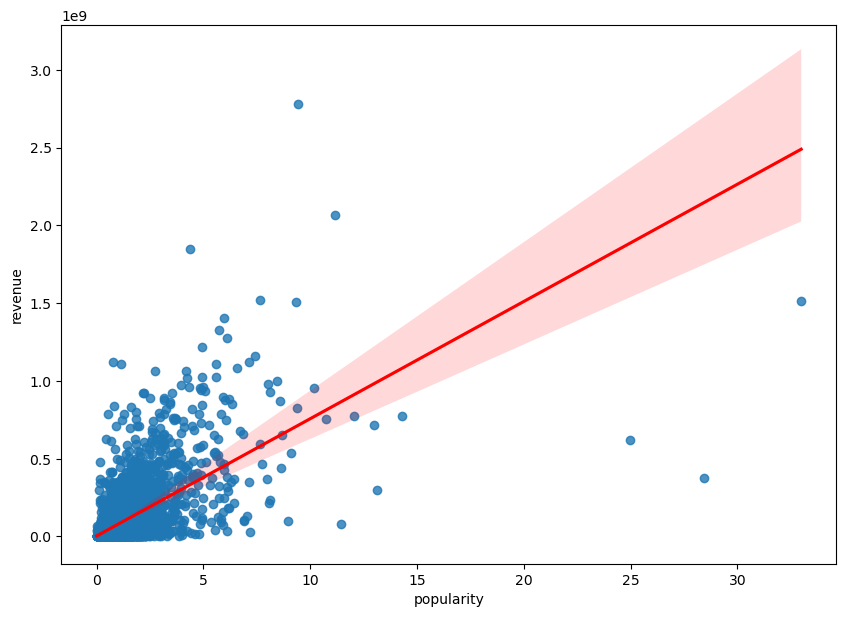

In [180]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x= 'popularity', y = 'revenue', data = movies_counted, ax = ax, line_kws = {'color' : 'red'})

# ---------------------------------------------------------------------------------------------------------------

### 3. Movies with high budgets return high profit

In [181]:
correlation = numeric_cols['budget'].corr(numeric_cols['profit'], method='spearman')
print(f"The Spearman correlation between 'budget' and 'profit' is: {correlation:.2f}")

The Spearman correlation between 'budget' and 'profit' is: 0.33


<Axes: xlabel='budget', ylabel='profit'>

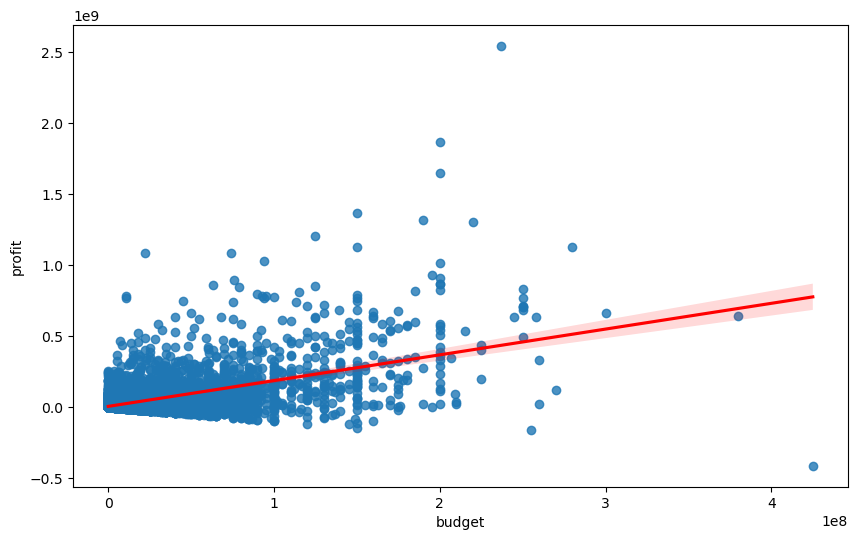

In [182]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x= 'budget', y = 'profit', data = movies_counted, ax = ax, line_kws = {'color' : 'red'})

### 4. Movies with high budgets have a high popularity

In [183]:
correlation = numeric_cols['budget'].corr(numeric_cols['popularity'], method='spearman')
print(f"The Spearman correlation between 'budget' and 'popularity' is: {correlation:.2f}")

The Spearman correlation between 'budget' and 'popularity' is: 0.49


<Axes: xlabel='budget', ylabel='popularity'>

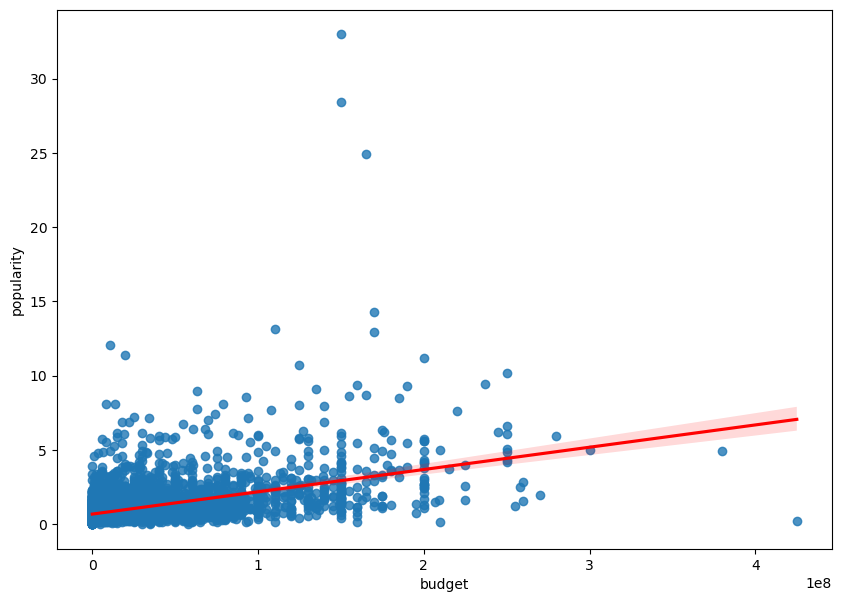

In [184]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.regplot(x= 'budget', y = 'popularity', data = movies_counted, ax = ax, line_kws = {'color' : 'red'})